In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"csvs\df_all.csv")

In [3]:
data.describe()

,background_max_distance,kernel_max_distance,textures_max_distance,textures_min_distance,barycenter_distance,group
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,16.383306,16.457061,30.682541,1.085510,14.114617,0.905260
std,3.435470,3.398518,7.824125,2.068380,4.483109,0.872536
min,3.000000,10.440307,15.000000,1.000000,5.138974,0.000000
25%,13.928388,14.035669,24.758837,1.000000,11.007116,0.000000
50%,15.652476,15.811388,29.068884,1.000000,13.175620,1.000000
75%,18.027756,18.357560,35.468296,1.000000,16.375950,2.000000
max,42.449971,39.623226,141.014184,118.511603,129.504252,2.000000


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.describe()

,background_max_distance,kernel_max_distance,textures_max_distance,textures_min_distance,barycenter_distance,group
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,16.316776,16.373511,30.496610,1.089748,14.025124,0.855284
std,3.447687,3.381720,7.845833,2.182035,4.527027,0.849278
min,3.000000,10.440307,15.000000,1.000000,5.138974,0.000000
25%,13.928388,13.928388,24.413111,1.000000,10.926306,0.000000
50%,15.524175,15.652476,29.068884,1.000000,13.009801,1.000000
75%,18.027756,18.027756,35.383612,1.000000,16.230487,2.000000
max,42.449971,39.623226,141.014184,118.511603,129.504252,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 3535
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   background_max_distance  3151 non-null   float64
 1   kernel_max_distance      3151 non-null   float64
 2   textures_max_distance    3151 non-null   float64
 3   textures_min_distance    3151 non-null   float64
 4   barycenter_distance      3151 non-null   float64
 5   group                    3151 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.3 KB


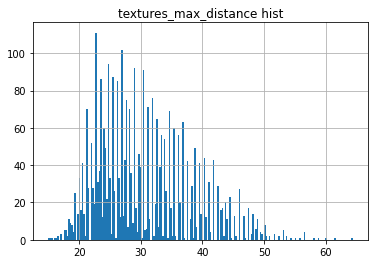

In [44]:
data["textures_max_distance"].hist(bins=200)
plt.title("textures_max_distance hist")
plt.savefig("textures_max_distance.png", dpi=200)

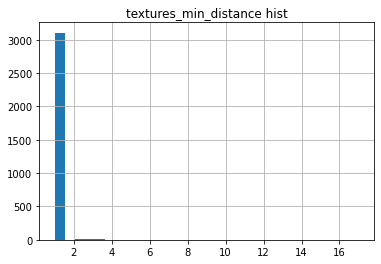

In [38]:
data["textures_min_distance"].hist(bins=30)
plt.title("textures_min_distance hist")
plt.savefig("textures_min_distance.png", dpi=200)

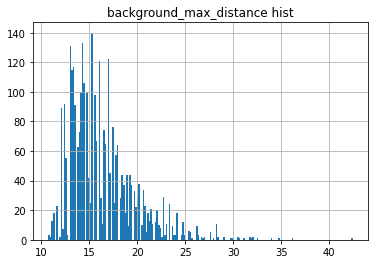

In [39]:
data.background_max_distance.hist(bins=200)
plt.title("background_max_distance hist")
plt.savefig("background_max_distance.png", dpi=200)

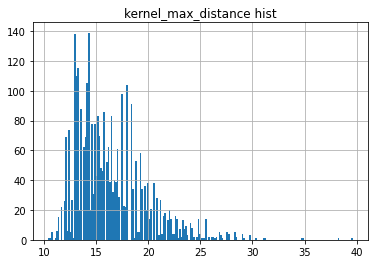

In [40]:
data.kernel_max_distance.hist(bins=200)
plt.title("kernel_max_distance hist")
plt.savefig("kernel_max_distance.png", dpi=200)

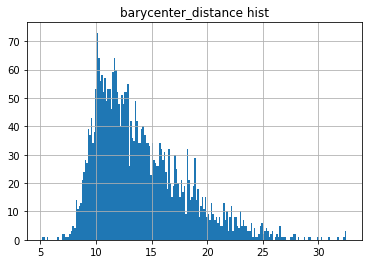

In [41]:
data.barycenter_distance.hist(bins=200)
plt.title("barycenter_distance hist")
plt.savefig("barycenter_distance.png", dpi=200)

In [42]:
#?pd.DataFrame.drop

In [13]:
data.drop(["textures_min_distance"], axis=1)

,background_max_distance,kernel_max_distance,textures_max_distance,barycenter_distance,group
0,12.369317,14.142136,22.671568,10.189276,0
1,16.155494,17.204651,31.240999,13.991094,0
2,16.552945,15.297059,30.413813,13.525940,0
3,17.000000,15.132746,29.832868,12.837341,0
4,16.155494,15.811388,30.413813,13.578361,0
...,...,...,...,...,...
3525,16.124515,15.132746,27.658633,12.118268,2
3527,19.416488,21.633308,41.231056,21.003817,2
3530,20.000000,20.248457,39.698866,20.827662,2
3532,20.615528,21.931712,43.139309,22.084511,2


In [27]:
index_delete = data[data.barycenter_distance > 40].index
data.drop(index_delete, inplace=True)

<AxesSubplot:>

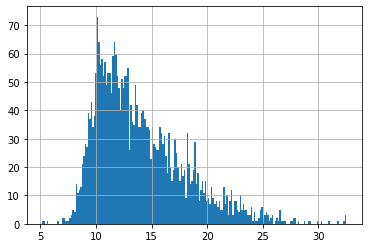

In [28]:
data.barycenter_distance.hist(bins=200)

In [29]:
data.shape

(3150, 6)

In [59]:
n_control = len(data[data.group == 0].index)
n_bc = len(data[data.group == 1].index)
n_fam = len(data[data.group == 2].index)

print(n_control, n_bc, n_fam)

1396 726 899


In [45]:
index_delete = data[data.barycenter_distance > 27].index
data.drop(index_delete, inplace=True)

In [46]:
data.shape

(3131, 6)

In [53]:
index_delete = data[data.background_max_distance > 25].index
data.drop(index_delete, inplace=True)

In [54]:
data.shape

(3047, 6)

In [57]:
index_delete = data[data.kernel_max_distance > 25].index
data.drop(index_delete, inplace=True)

In [58]:
data.shape

(3021, 6)

In [63]:
feat = ["background_max_distance", "kernel_max_distance", "textures_max_distance", "barycenter_distance"]
data[feat].describe()

,background_max_distance,kernel_max_distance,textures_max_distance,barycenter_distance
count,3021.000000,3021.000000,3021.000000,3021.000000
mean,15.972734,16.044878,29.686976,13.570045
std,2.896136,2.891899,6.688843,3.492251
min,10.770330,10.440307,15.000000,5.138974
25%,13.601471,13.928388,24.207437,10.856553
50%,15.297059,15.524175,28.425341,12.828382
75%,17.804494,17.888544,34.655447,15.788653
max,25.000000,25.000000,49.497475,26.840578


In [64]:
data.to_csv("last.csv")